# Complex Convolutional Neural Network (CNN)

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py

In [3]:
print(tf.__version__)

2.5.0-dev20201211


In [4]:
# X training
f = h5py.File("./X_training_serial_balanced.h5","r")
print(f.keys())
train_images = f['training_d'][:]
f.close()
train_images[np.isnan(train_images)] = 0.

# Y training
f = h5py.File("./Y_training_serial_balanced.h5","r")
print(f.keys())
train_labels = f['train_labels_d'][:].astype(int)
f.close()

# X validation
f = h5py.File("./X_validation.h5","r")
val_images = f['validation'][:]
f.close()
val_images[np.isnan(val_images)] = 0.

# Y validation
f = h5py.File("./Y_validation.h5","r")
val_labels = f['val_labels'][:].astype(int)
f.close()

# X testing
f = h5py.File("./X_testing.h5","r")
test_images = f['testing'][:]
f.close()
test_images[np.isnan(test_images)] = 0.

# Y testing
f = h5py.File("./Y_testing.h5","r")
test_labels = f['test_labels'][:].astype(int)
f.close()


<KeysViewHDF5 ['training_d']>
<KeysViewHDF5 ['train_labels_d']>


In [5]:
print(train_images.shape)
print(train_labels.shape)

(112700, 32, 32, 3)
(112700, 1)


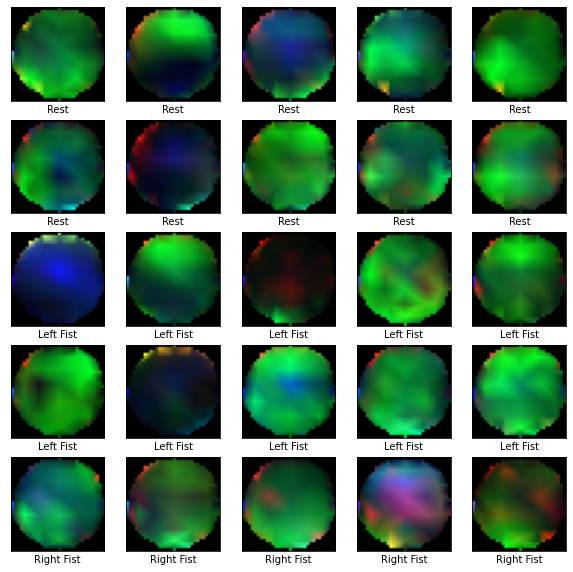

In [6]:
class_names = ['Rest', 'Left Fist', 'Right Fist', 'Both Fists', 'Both Feet']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
# Number of occurences of each class that occur before
a = np.unique(train_labels,return_counts =1, return_index=1, return_inverse = 1)
print(a[3])

print(train_labels[3:13])


[22540 22540 22540 22540 22540]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [10]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(112700, 32, 32, 3)
(112700, 1)
(1800, 32, 32, 3)
(1800, 1)


# Model

In [11]:
# Simple CNN Network


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 5

Epoch 1/20


C:\Users\Alkinoos\anaconda3\envs\NEW\lib\site-packages\tensorflow\python\keras\backend.py:5008: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


112700/112700 [==============================] - 946s 8ms/step - loss: 1.5893 - accuracy: 0.2472 - val_loss: 1.7562 - val_accuracy: 0.2289
Epoch 2/20
112700/112700 [==============================] - 791s 7ms/step - loss: 1.5561 - accuracy: 0.2815 - val_loss: 1.5911 - val_accuracy: 0.3611
Epoch 3/20
112700/112700 [==============================] - 912s 8ms/step - loss: 1.5411 - accuracy: 0.2942 - val_loss: 1.9314 - val_accuracy: 0.1717
Epoch 4/20
112700/112700 [==============================] - 963s 9ms/step - loss: 1.5309 - accuracy: 0.3041 - val_loss: 1.6751 - val_accuracy: 0.2656
Epoch 5/20
112700/112700 [==============================] - 864s 8ms/step - loss: 1.5263 - accuracy: 0.3042 - val_loss: 1.8338 - val_accuracy: 0.2483
Epoch 6/20
112700/112700 [==============================] - 914s 8ms/step - loss: 1.5178 - accuracy: 0.3132 - val_loss: 1.7699 - val_accuracy: 0.2700
Epoch 7/20
112700/112700 [==============================] - 877s 8ms/step - loss: 1.5163 - accuracy: 0.3128 - v

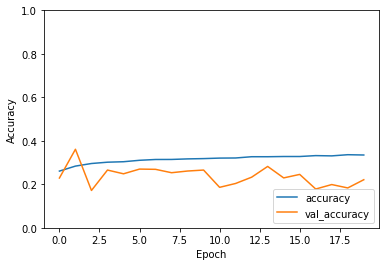

In [13]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size = 1,
                    validation_data=(val_images, val_labels), shuffle=True)

print("\n")
# Predict on the test images
predictions = model.predict(test_images)
# Print our model's predictions.
predicts = np.argmax(predictions, axis=1)
print(predicts[0:40]) 
print("\n")
# Check our predictions against the ground truths.
print(test_labels[0:40].flatten())

print("\n")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
print("\n")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("\n")
print(test_acc)
print("\n")

# Number of occurences of each class that occur before
b = np.unique(predicts,return_counts =1, return_index=1, return_inverse = 1)
print(b[0])
print(b[3])

In [14]:
# Save the model
model.save("model_arch_1.h5")

In [15]:
# TFLite Section


tflite_model_name = 'MFCC_arch_1'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for i in range(500):
            yield([train_images[i].reshape(1,32,32,3).astype('float32')])
    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Alkinoos\AppData\Local\Temp\tmpdr7kicox\assets


71096

In [16]:
# TFLite Section


tflite_model_name = 'quant_model_1'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for i in range(500):
            yield([train_images[i].reshape(1,32,32,3).astype('float32')])
    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Alkinoos\AppData\Local\Temp\tmp1d2tjc0w\assets


INFO:tensorflow:Assets written to: C:\Users\Alkinoos\AppData\Local\Temp\tmp1d2tjc0w\assets


71096

In [17]:
# This function here takes in the model and outputs a header file we will import into the TFLite example project folder. (/Core/Inc/)
# Function: Convert some hex value into an array for C programming

def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str


c_model_name = 'MFCC_arch_1'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))
    

tflite_interpreter = tf.lite.Interpreter(model_path=tflite_model_name + '.tflite')
tflite_interpreter.allocate_tensors()
input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])



== Input details ==
name: conv2d_input_int8
shape: [ 1 32 32  3]
type: <class 'numpy.int8'>

== Output details ==
name: Identity_int8
shape: [1 5]
type: <class 'numpy.int8'>
